In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf 
import keras

In [2]:
a=np.loadtxt('caracteristicas.txt', dtype='str')
a1=pd.DataFrame(a)
a1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,PGC0000212,212,11230.4,4.5,11110,47,11229.3,9,11287.9,0.03765,3.002e-05,Sab,IC5381,PGC000212
1,PGC0000218,218,1050.3,4.8,1027.4,25,1049.5,4.5,1109,0.003699,1.501e-05,Sab,NGC7814,PGC1501809
2,PGC0000243,243,-9999,-9999,8914.3,16.3,8914.3,16.3,8841.8,0.02949,5.437e-05,S0,NGC7808,6dFJ0003321-104441
3,PGC0000255,255,878.1,4.1,-9999,-9999,878.1,4.1,932.9,0.003112,1.368e-05,Sm,UGC00017,PGC000255
4,PGC0000281,281,-9999,-9999,11490.7,16.4,11490.7,16.4,11416,0.03808,5.47e-05,Sc,PGC000281,MCG-02-01-015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,PGC0072806,7.281e+04,-9999,-9999,18356.6,15.9,18356.6,15.9,18341.9,0.06118,5.304e-05,S0-a,PGC072806,HCG098D
4454,PGC0072922,7.292e+04,6664.7,7.3,6717.8,20.8,6670.6,12.6,6648.3,0.02218,4.203e-05,Sb,IC1515,PGC197276
4455,PGC0072927,7.293e+04,7279.8,7.7,7279,18.5,7279.7,5.1,7257.8,0.02421,1.701e-05,Sbc,IC1516,HIPASSJ2356-00
4456,PGC0072930,7.293e+04,6668,5.2,6651.8,29.1,6667.5,4.1,6652.9,0.02219,1.368e-05,S0-a,NGC7787,MCG+00-01-005


<AxesSubplot:>

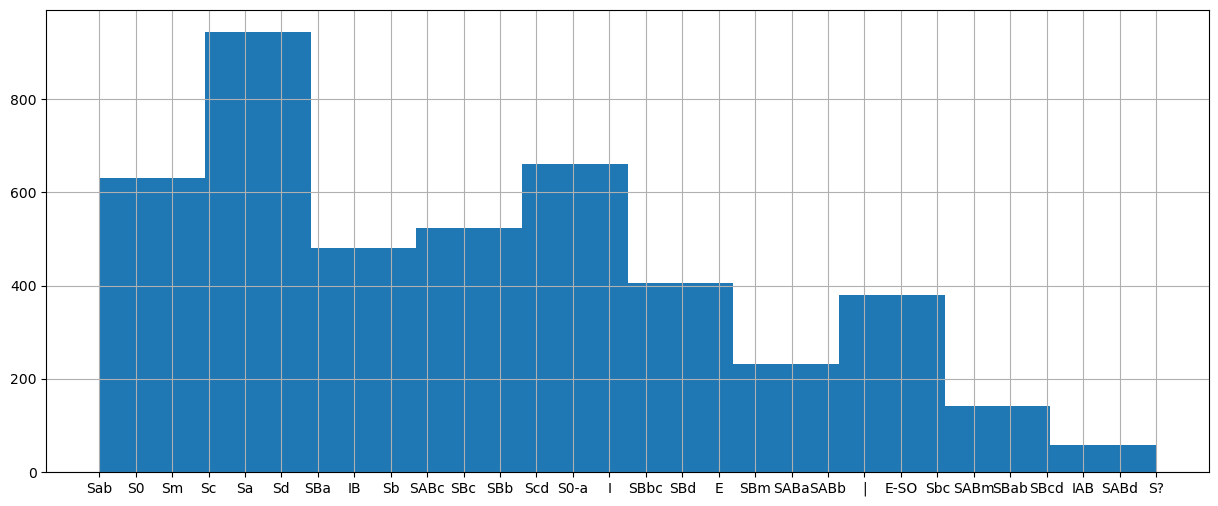

In [3]:
plt.figure(figsize=(15,6))
a1[11].hist()

In [4]:
a1[11].unique()

array(['Sab', 'S0', 'Sm', 'Sc', 'Sa', 'Sd', 'SBa', 'IB', 'Sb', 'SABc',
       'SBc', 'SBb', 'Scd', 'S0-a', 'I', 'SBbc', 'SBd', 'E', 'SBm',
       'SABa', 'SABb', '|', 'E-SO', 'Sbc', 'SABm', 'SBab', 'SBcd', 'IAB',
       'SABd', 'S?'], dtype=object)

In [5]:
a1[11].describe()

count     4458
unique      30
top         Sc
freq       603
Name: 11, dtype: object

In [6]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [7]:
galaxys=load_images_from_folder('png')

In [8]:
galaxys=np.array(galaxys)

In [9]:
galaxys.shape

(4458, 255, 255, 3)

Como vemos, hay tres canales de color, por lo que vamos a usar sólo uno de ellos para la clasificación.

In [10]:
data=galaxys[:,:,:,0]/255 #normalizamos las imagenes para que el grado de los pixeles se encuentre entre 0 y 1

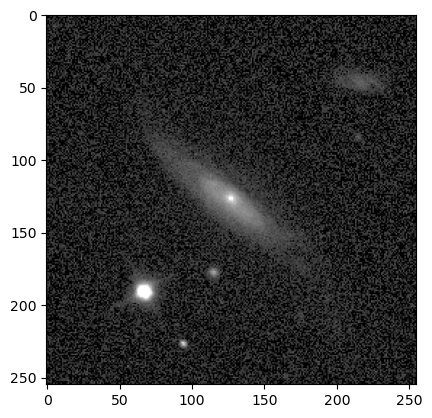

In [11]:
plt.imshow(data[0],cmap='gray')

### Ahora vamos a crear nuevas etiquetas para cada una de las clases, con el fin de disminuir la cantidad de calses.

De todo el conjunto de clases que tenemos, vamos a crear un conjunto con sólo 5 clases, a asaber:

   ---Espirales
   
   ---Espirales Barradas
   
   ---Irregulares
   
   ---Lenticulares
   
   ---Elípticas
   
Para esto vamos a usar la información contenida en las etiquetas de cada clase. Sabemos que si comienza con S,por ejemplo, es del grupo de las espirales; si lo hace con E, es de las elípticas.
'I' es para las irregulares.

Si contiene una 'B' en el nombre, hay la presencia de una barra o la transición de una.

Etc...

In [12]:
#Estos serán los vectores one-hot de las clases:
clases=np.zeros((4458,5))

La estructura del vector one-hot quedará como:

### (Eliptica, Espiral, Espiral Barrada, Lenticular, Irregular)

In [13]:
for i in range(4458):
    #Elípticas
    if 'E' in a1[11][i]:
        clases[i,0]=1
    #Espiral
    if 'S' in a1[11][i] and ('B' not in a1[11][i] and '0' not in a1[11][i] and 'O' not in a1[11][i]):
        clases[i,1]=1
    #Espiral Barrada
    if ('S' in a1[11][i] and 'B' in a1[11][i]):
        clases[i,2]=1
    #Lenticular
    if '0' in a1[11][i]:
        clases[i,3]=1
    #Irregular
    if ('I' in a1[11][i] or '|' in a1[11][i]):
        clases[i,4]=1

In [14]:
clases

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Para ver si funciona, vamos a tomar un par de imágenes y pedir su clase:


In [15]:
 def tipo_galaxia(i):
        plt.imshow(data[i],cmap='gray')
        if clases[i,0]==1: print('Es una galaxia Elíptica')
        if clases[i,1]==1: print('Es una galaxia Espiral')
        if clases[i,2]==1: print('Es una galaxia Espiral Barrada')
        if clases[i,3]==1: print('Es una galaxia Lenticular')
        if clases[i,4]==1: print('Es una galaxia Irregular')

Es una galaxia Elíptica


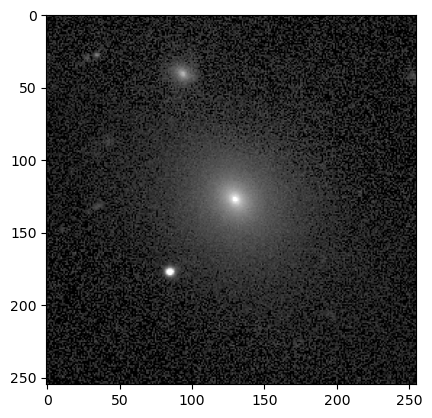

In [16]:
tipo_galaxia(897)

Es una galaxia Espiral


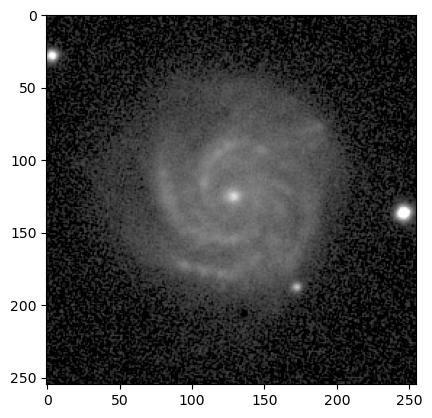

In [17]:
tipo_galaxia(4016)

Es una galaxia Espiral Barrada


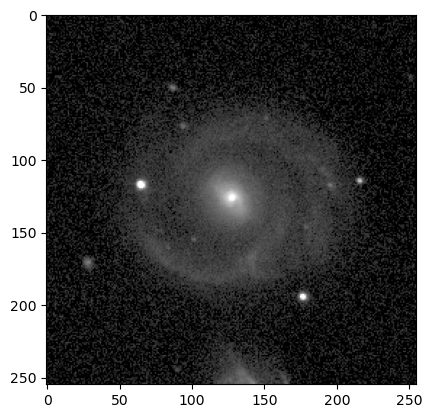

In [18]:
tipo_galaxia(189)

Es una galaxia Lenticular


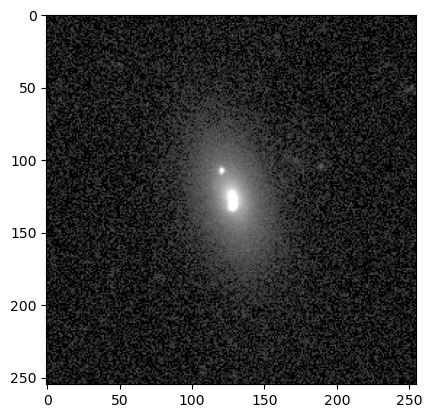

In [19]:
tipo_galaxia(138)

Es una galaxia Irregular


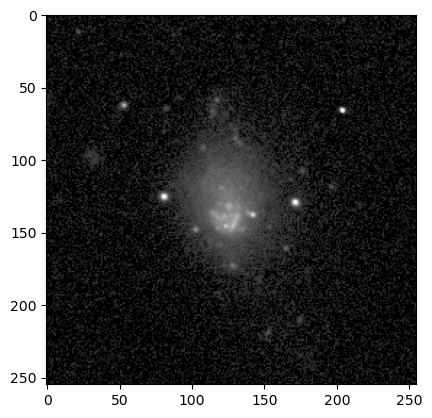

In [20]:
tipo_galaxia(1778)

Ahora vamos a dividir el conjunto total de los datos en tres subconjuntos:

Uno para que la red neuronal entrene:

$$X_{train},Y_{train}$$

Uno para que en el proceso de aprendizaje valide:

$$X_{val}, Y_{val}$$

Y finalmente un conjunto con el que la red no tenga contacto durante su entrenamiento, para probar su efectividad.

$$X_{test}, Y_{test}$$

In [21]:
#definimos la función que nos haga esa separación:
from math import floor
import random
def split(X,Y,porcent): #porcent must be between 0 and 1, it is the asigned porcent to the training dataset.
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    return X_learn,Y_learn,X_val,Y_val

In [22]:
X_train,Y_train,X_val,Y_val=split(data,clases,0.8)

In [23]:
#X_val,Y_val,X_test,Y_test=split(X,Y,0.7)

In [24]:
X_train.shape

(3566, 255, 255)

### Ahora definimos la estructura de red que hará el trabajo de clasificación:

In [37]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
from keras import backend as K

In [24]:
X_train.shape

(3566, 255, 255)

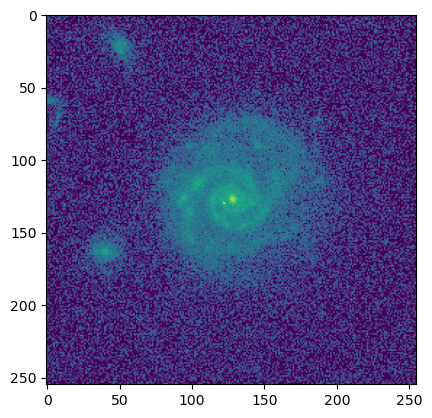

In [25]:
plt.imshow(X_val[26])

In [26]:
Y_val[26]

array([0., 1., 0., 0., 0.])

In [27]:
img_width, img_height = 255, 255


if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

In [28]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(70, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(5))
model.add(Activation('softmax'))

In [29]:
lr = 0.001  # Learning rate
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer=optimizers.Adam(learning_rate=lr))

In [30]:
num_epochs = 15

history =model.fit(X_train, Y_train, epochs=num_epochs,
                               validation_data=(X_val,Y_val))


Epoch 1/15
112/112 [==============================] - 139s 1s/step - loss: 1.4075 - accuracy: 0.4153 - val_loss: 1.3254 - val_accuracy: 0.4462
Epoch 2/15
112/112 [==============================] - 130s 1s/step - loss: 1.3328 - accuracy: 0.4397 - val_loss: 1.2094 - val_accuracy: 0.4821
Epoch 3/15
112/112 [==============================] - 130s 1s/step - loss: 1.1744 - accuracy: 0.4787 - val_loss: 1.0825 - val_accuracy: 0.5168
Epoch 4/15
112/112 [==============================] - 129s 1s/step - loss: 1.0806 - accuracy: 0.5098 - val_loss: 1.1010 - val_accuracy: 0.5078
Epoch 5/15
112/112 [==============================] - 129s 1s/step - loss: 1.0028 - accuracy: 0.5561 - val_loss: 1.0342 - val_accuracy: 0.5135
Epoch 6/15
112/112 [==============================] - 129s 1s/step - loss: 0.9130 - accuracy: 0.6127 - val_loss: 1.0619 - val_accuracy: 0.4922
Epoch 7/15
112/112 [==============================] - 131s 1s/step - loss: 0.8140 - accuracy: 0.6789 - val_loss: 1.0749 - val_accuracy: 0.4765

In [31]:
model.save('galaxias_1.h5')

In [25]:
from keras import models
model = models.load_model('galaxias_1.h5')

In [26]:
model.evaluate(data,clases)

140/140 [==============================] - 43s 273ms/step - loss: 0.4341 - accuracy: 0.8827


[0.43412885069847107, 0.8826828002929688]

In [33]:
conda install seaborn


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Kingsman\.conda\envs\tf_cpu

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.1             |   py39haa95532_0         474 KB
    ------------------------------------------------------------
                                           Total:         474 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/win-64::seaborn-0.12.1-py39haa95532_0 None




seaborn-0.12.1       | 474 KB    |            |   0% 
seaborn-0.12.1       | 474 KB    | 3          |   3% 
seaborn-0.12.1       | 474 KB    | #          |  10% 
seaborn-0.12.1       | 474 KB    | ##         |  20% 
seaborn-0.12.1   



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [39]:
pip install -U scikit-learn


     ---------------------------------------- 8.3/8.3 MB 459.6 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 196.0 kB/s eta 0:00:00


In [40]:
import seaborn as cns
from sklearn.metrics import confusion_matrix
import sklearn.metrics

In [45]:
def plot_cm(Y_reales,Y_predichos, labels, porcentaje=False):
    #Generamos la matriz de confusión a partir de los dos arreglos
    matrix = sklearn.metrics.confusion_matrix(Y_reales.argmax(axis=1), Y_predichos.argmax(axis=1))
    
    plt.title("Confusion matrix")
    #Aquí se divie si la queremos en porcentaje o en números
    if porcentaje==False: ax = cns.heatmap(matrix, annot=True, cmap="viridis", cbar_kws={'label': 'scale'})
    if porcentaje==True:
        m=np.zeros(matrix.shape)
        for j in range(0,matrix.shape[1]):
            m[:,j]=matrix[:,j]/np.sum(matrix[:,j])
        ax = cns.heatmap(m, annot=True,fmt='.2%',
                                          cmap='viridis', cbar_kws={'label': 'scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(xlabel="True label", ylabel="Predicted label")

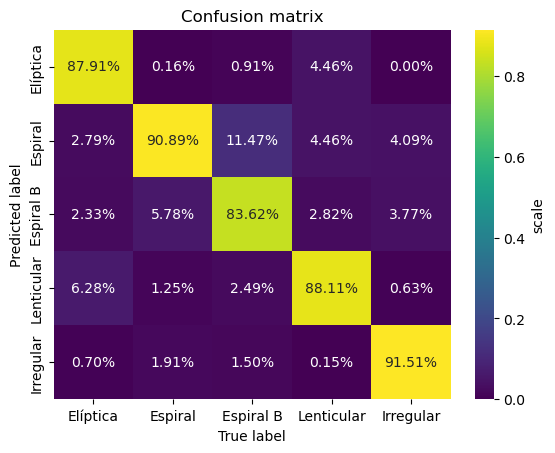

In [48]:
#y_test=model.predict(data)
labels=['Elíptica','Espiral','Espiral B', 'Lenticular', 'Irregular']
plot_cm(clases,y_test, labels, porcentaje=True)
plt.savefig('matriz_conf_galaxias.pdf')